# Graph Class

The directed graph will be implemented with an adjacency map. The adjacency map is a dictionary of vertex labels pointing to vertices. 

Each vertex stores a list of out-edges. An "out-edge" is an edge starting at a particular vertex and pointing out to a different vertex.

In [1]:
class Vertex:
    
    def __init__(self, label):
        self.label = label
        self.edges = []
        # Used to track if this vertex has been visited during depth-first search.
        self.visited = False
    
    
    def addEdge(self, destinationVertex, weight=1):
        '''Adds an edge with optional weighting. Weights ended up not being relevant for this notebook.'''
        self.edges.append((destinationVertex, weight))
    
    
    def __repr__(self):
        return f"{self.label}"
    
    
    def __eq__(self, other):
        return self.label == other.label

In [2]:
class Graph:
    
    def __init__(self):
        self.vertices = {}
    
    
    def addVertex(self, vertexLabel):
        newVertex = Vertex(vertexLabel)
        self.vertices[vertexLabel] = newVertex
    
    
    def addEdge(self, sourceVertexLabel, destinationVertexLabel, weight=1):
        sourceVertex = self.vertices[sourceVertexLabel]
        destinationVertex = self.vertices[destinationVertexLabel]
        sourceVertex.addEdge(destinationVertex, weight)

## Test Graph

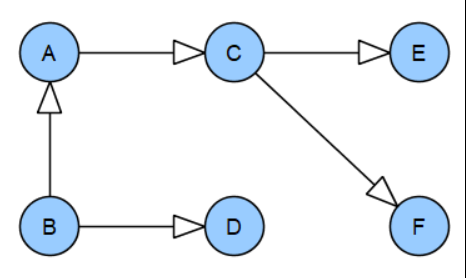

In [4]:
G = Graph()

## Vertices

In [5]:
labels = "A, B, C, D, E, F".split(",")
labels

['A', ' B', ' C', ' D', ' E', ' F']

In [6]:
for label in labels:
    # strip white space from each letter e.g. " B" -> "B"
    G.addVertex(label.strip())

In [7]:
G.vertices

{'A': A, 'B': B, 'C': C, 'D': D, 'E': E, 'F': F}

## Edges

In [8]:
edges = [
    ("A", "C"),
    ("B", "A"),
    ("B", "D"),
    ("D", "C"),
    ("C", "E"),
    ("C", "F")
]

In [9]:
for edge in edges:
    G.addEdge(edge[0], edge[1])

In [10]:
G.vertices['A'].edges

[(C, 1)]

# Finding a Central Station

## What is a Central Station?

> A **central station** is a vertex that can reach all other vertices in the graph.

## Algorithm

Basically:

1. Pick a random vertex.
2. Perform DFS. Give each vertex a pre and post number.
3. Run DFS again, this time from the vertex with the largest post number. If this vertex can reach all other vertices, it is  a central station. If it cannot, the graph has no central station.

## Implementation

As far as the implementation is concerned, there is no real point to labeling each vertex with pre and post numbers. The last node visited will be the node with the highest post number and since this is the only vertex we care about numbering is unnecessary.

In [11]:
def explore(vertex, count):
    '''Recursive DFS generator used to explore one vertex.'''
    vertex.visited = True
    # previsit
    count[0] = count[0] + 1
    yield ("previsit", count[0], vertex)
    
    for edge in vertex.edges:
        child = edge[0]
        if not child.visited:
            # visit children
            yield from explore(child, count)
    
    
    # postvisit
    count[0] = count[0] + 1
    yield ("postvisit", count[0], vertex)

In [12]:
def dfs(graph, vertexLabel):
    '''DFS generator that yields a tuple of data for each vertex
    (pre and post visit). The tuple is:
        ('previsit' or 'postvisit', count, vertex).'''
    
    # For pre and post numbering. Not really needed, but could be helpful to see this.
    # Using a list as a hack to keep count mutable.
    count = [0]
    
    # Set all vertices to unvisited.
    for vertex in graph.vertices.values():
        vertex.visited = False
    
    # Get the starting vertex.
    startingVertex = graph.vertices[vertexLabel]
    
    # Explore the starting vertex.
    yield from explore(startingVertex, count)
    
    # If there are vertices in the graph that are not connected to the starting
    # vertex, they will be missed. Check for this.
    for vertex in graph.vertices.values():
        if not vertex.visited:
            # This vertex hasn't been explored yet.
            yield from explore(vertex, count)

In [13]:
for v in dfs(G, 'C'):
    print(v)

('previsit', 1, C)
('previsit', 2, E)
('postvisit', 3, E)
('previsit', 4, F)
('postvisit', 5, F)
('postvisit', 6, C)
('previsit', 7, A)
('postvisit', 8, A)
('previsit', 9, B)
('previsit', 10, D)
('postvisit', 11, D)
('postvisit', 12, B)


The vertex with the highest postnumber could be a central station. To ensure that it is, run DFS again from this vertex.

In [14]:
for v in dfs(G, 'B'):
    print(v)

('previsit', 1, B)
('previsit', 2, A)
('previsit', 3, C)
('previsit', 4, E)
('postvisit', 5, E)
('previsit', 6, F)
('postvisit', 7, F)
('postvisit', 8, C)
('postvisit', 9, A)
('previsit', 10, D)
('postvisit', 11, D)
('postvisit', 12, B)


Since B has the highest post number again, it is a central station.

Wrapping this up into a function:

In [15]:
def centralStation(graph):
    startingVertex = next(iter(graph.vertices.values()))
    numberOfVertices = len(graph.vertices.values())
    
    # First DFS
    for visit in dfs(graph, startingVertex.label):
        count = visit[1]
        vertex = visit[2]
        if count == numberOfVertices * 2:
            highestPostVertex1 = vertex
    
    
    # Second DFS
    for visit in dfs(graph, highestPostVertex1.label):
        count = visit[1]
        vertex = visit[2]
        if count == numberOfVertices * 2:
            highestPostVertex2 = vertex
    
    
    if highestPostVertex1.label == highestPostVertex2.label:
        return highestPostVertex1
    
    # No central station.
    return None

In [16]:
centralStation(G)

B

By hand:

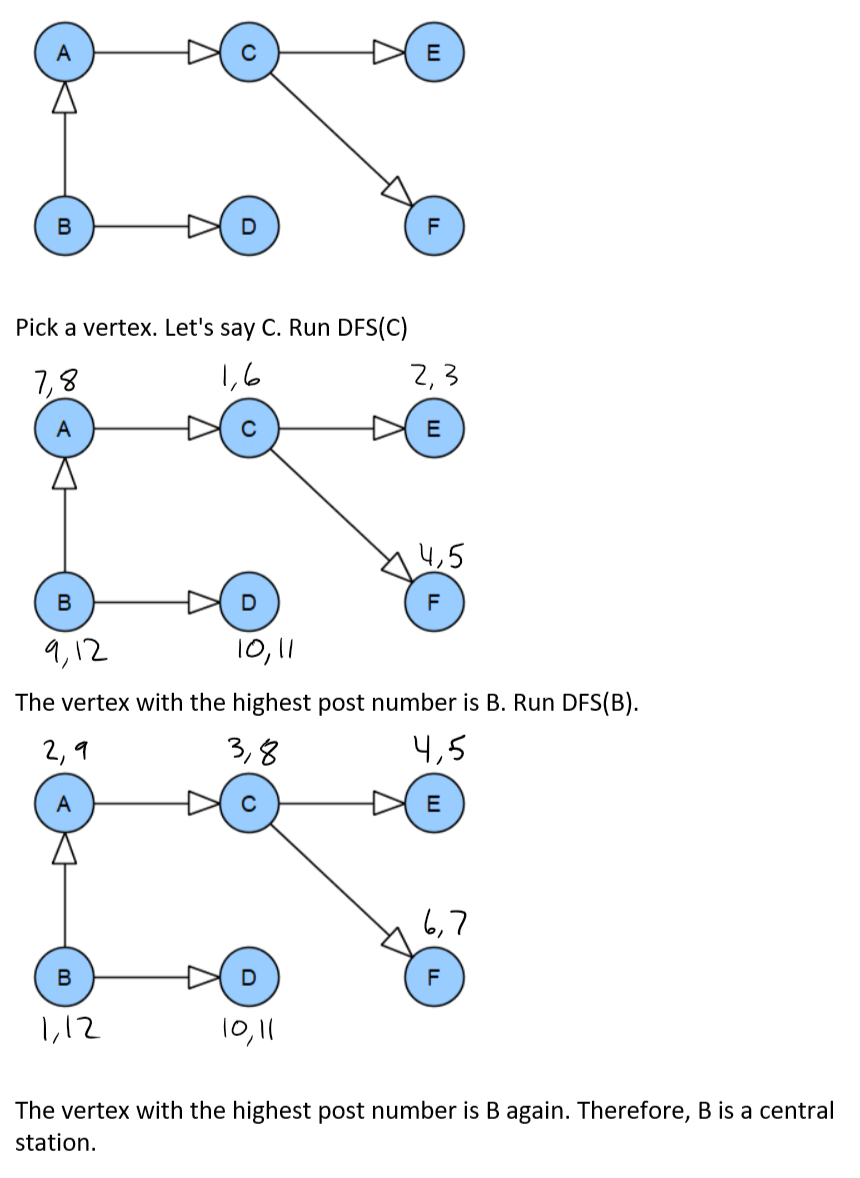